Metric         Accuracy  Precision    Recall  F1 Score   ROC-AUC
cnn_base       0.441268   0.467507  0.441268  0.451657  0.395945
cnn_fine_tune  0.512282   0.551601  0.512282  0.523268  0.523044 (use this)
BERT           0.985708   0.971250  0.979823  0.988550  0.230321
RF_base        0.696740   0.577536  0.506997  0.539973  0.787278
RF_fine_tune   0.702546   0.568182  0.636132  0.600240  0.763161 (use this)
XGB_base       0.688477   0.542733  0.715013  0.617074  0.755648
XGB_fine_tune  0.702546   0.568182  0.636132  0.600240  0.763161 (use this)

<Figure size 1200x600 with 0 Axes>

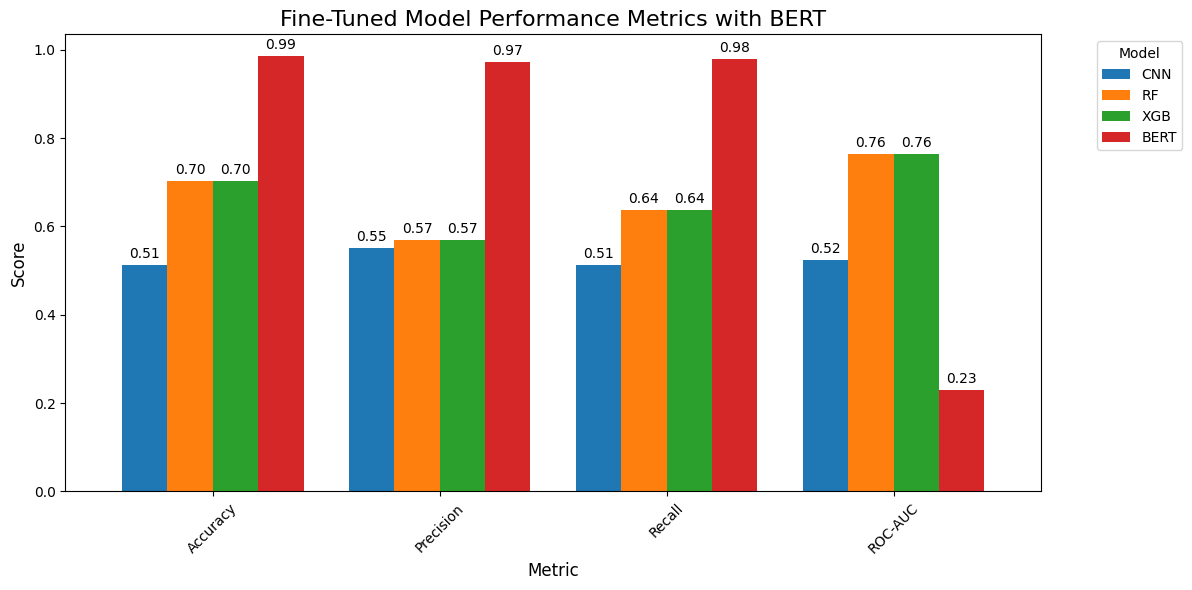

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the updated data in a dictionary format
data = {
    'Model': ['CNN', 'RF', 'XGB', 'BERT'],
    'Accuracy': [0.512282, 0.702546, 0.702546, 0.985708],
    'Precision': [0.551601, 0.568182, 0.568182, 0.971250],
    'Recall': [0.512282, 0.636132, 0.636132, 0.979823],
    'ROC-AUC': [0.523044, 0.763161, 0.763161, 0.230321]
}

# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)

# Set the figure size and make adjustments to the width of the bars
plt.figure(figsize=(12, 6))  # Adjusted figure size

# Plot the data with transposed DataFrame to display metrics on the x-axis
ax = df.set_index('Model').T.plot(kind='bar', width=0.8, figsize=(12, 6))  # Adjusted bar width

# Add title and labels
plt.title('Fine-Tuned Model Performance Metrics with BERT', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Metric', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

# Display the legend
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data in a dictionary format
data = {
    'Model': ['CNN', 'BERT', 'RF', 'XGB'],
    'Accuracy': [0.512282, 0.971192, 0.704332, 0.702546],
    'Precision': [0.551601, 0.959847, 0.587324, 0.568182],
    'Recall': [0.512282, 0.958930, 0.530534, 0.636132],
    'ROC-AUC': [0.523044, 0.178503, 0.790971, 0.763161]
}

# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the data with transposed DataFrame to display metrics on the x-axis
ax = df.set_index('Model').T.plot(kind='bar', width=0.8, figsize=(10, 6))

# Add title and labels
plt.title('Model Performance Metrics', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Metric', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

# Display the legend
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


## Plot for the initial testing set from the train test split

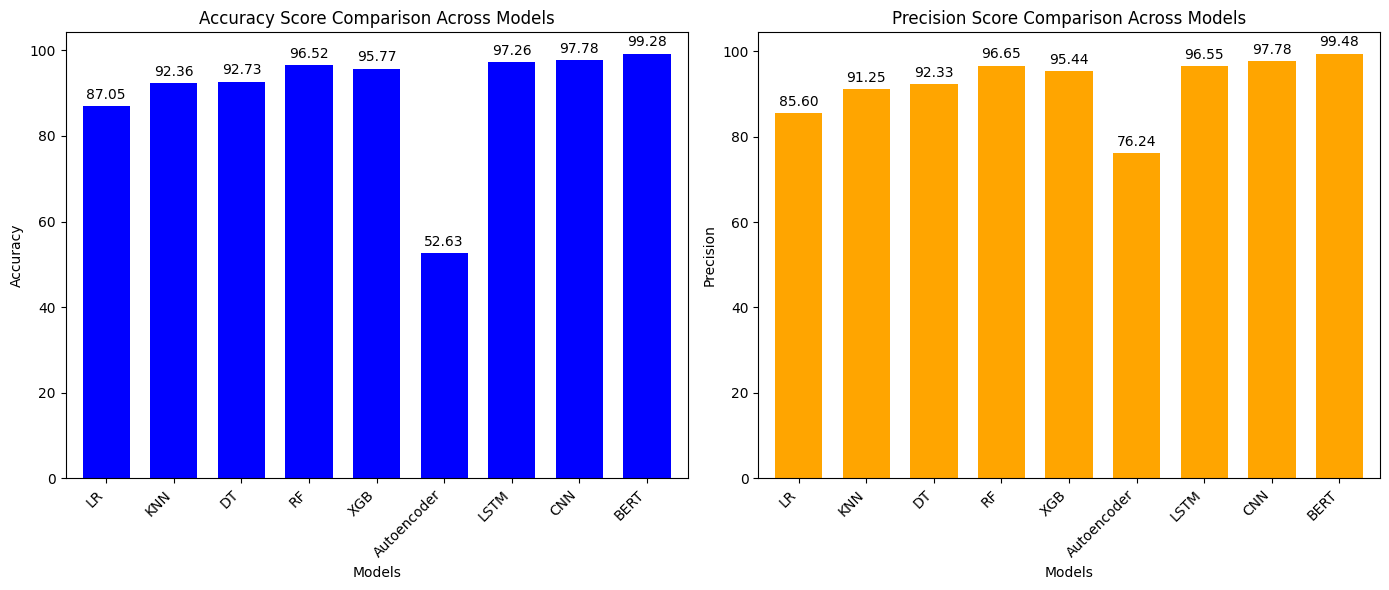

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data
data = {
    'Model': ['LR', 'KNN', 'DT', 'RF', 'XGB', 'Autoencoder', 'LSTM', 'CNN', 'BERT'],
    'Accuracy': [87.05, 92.36, 92.73, 96.52, 95.77, 52.63, 97.26, 97.78, 99.28],
    'Precision': [85.60, 91.25, 92.33, 96.65, 95.44, 76.24, 96.55, 97.78, 99.48],
    # 'Recall': [89.08, 93.71, 93.21, 96.38, 96.13, 7.63, 98.03, 97.78, 99.09],
    # 'ROC-AUC': [94.18, 97.73, 92.73, 99.49, 99.18, 52.63, 99.61, 99.73, 99.97]
}

# Convert data into a pandas DataFrame
df = pd.DataFrame(data)

# Set up the figure and axes for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Accuracy
ax1 = axes[0]
df.plot(x='Model', y='Accuracy', kind='bar', color='blue', ax=ax1, width=0.7, legend=False)
ax1.set_title('Accuracy Score Comparison Across Models')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Models')

# Add data labels for Accuracy
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

# Rotate x-axis labels for readability
ax1.set_xticklabels(df['Model'], rotation=45, ha='right')

# Plot for Precision
ax2 = axes[1]
df.plot(x='Model', y='Precision', kind='bar', color='orange', ax=ax2, width=0.7, legend=False)
ax2.set_title('Precision Score Comparison Across Models')
ax2.set_ylabel('Precision')
ax2.set_xlabel('Models')

# Add data labels for Precision
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

# Rotate x-axis labels for readability
ax2.set_xticklabels(df['Model'], rotation=45, ha='right')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Lambda
from tensorflow.keras.utils import plot_model

# Step 1: Set parameters for the model
word_embedding_dims = 64
no_of_filters = 256
kernel_size = 5
hidden_dims = 256
batch_size = 256
epochs = 100
threshold = 0.5

# Build the CNN model
cnn = Sequential()

# Add embedding layer
cnn.add(Embedding(input_dim=750, output_dim=word_embedding_dims, input_length=1750))

# Add 1D convolution layer
cnn.add(Conv1D(no_of_filters, kernel_size, padding='valid', activation='relu'))

# Add global max pooling layer
cnn.add(GlobalMaxPooling1D())

# Add dense layer with ReLU activation, and explicitly name it for visualization
cnn.add(Dense(hidden_dims, activation='relu', name='Dense_ReLU_Activation'))

# Add output layer with sigmoid activation for binary classification
cnn.add(Dense(1, activation='sigmoid', name='Sigmoid_Activation'))

# Add a dummy layer to show the loss function in the visualization (we'll annotate this later)
cnn.add(Lambda(lambda x: x, name='BinaryCrossEntropy_Loss'))

# Compile the model (here, binary_crossentropy is used, but it won't show directly in the diagram)
cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 2: Generate dummy data to build the model
dummy_data = np.random.randint(0, 750, size=(1000, 1750))  # 1000 samples with 1750 words each
dummy_labels = np.random.randint(0, 2, size=(1000, 1))  # Binary labels (0 or 1)

# Step 3: Build the model by calling it on dummy data
cnn.fit(dummy_data, dummy_labels, batch_size=batch_size, epochs=1, verbose=1)

# Step 4: Visualize the model and save it to a PNG file
plot_model(cnn, to_file='cnn_model_visualization.png', show_shapes=True, show_layer_names=True)

# Step 5: Show the model summary
cnn.summary()


2024-11-10 11:04:53.068701: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.5271 - loss: 0.6956


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 1750, 64)       │        48,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 1746, 256)      │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 256)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_ReLU_Activation (Dense)   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Sigmoid_Activation (Dense)      │ (None, 1)              │           257 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BinaryCrossEntropy_Loss         │ (None, 1)              │             0 │
│ (Lambda)                        │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 588,677 (2.25 MB)

 Trainable params: 196,225 (766.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 392,452 (1.50 MB)

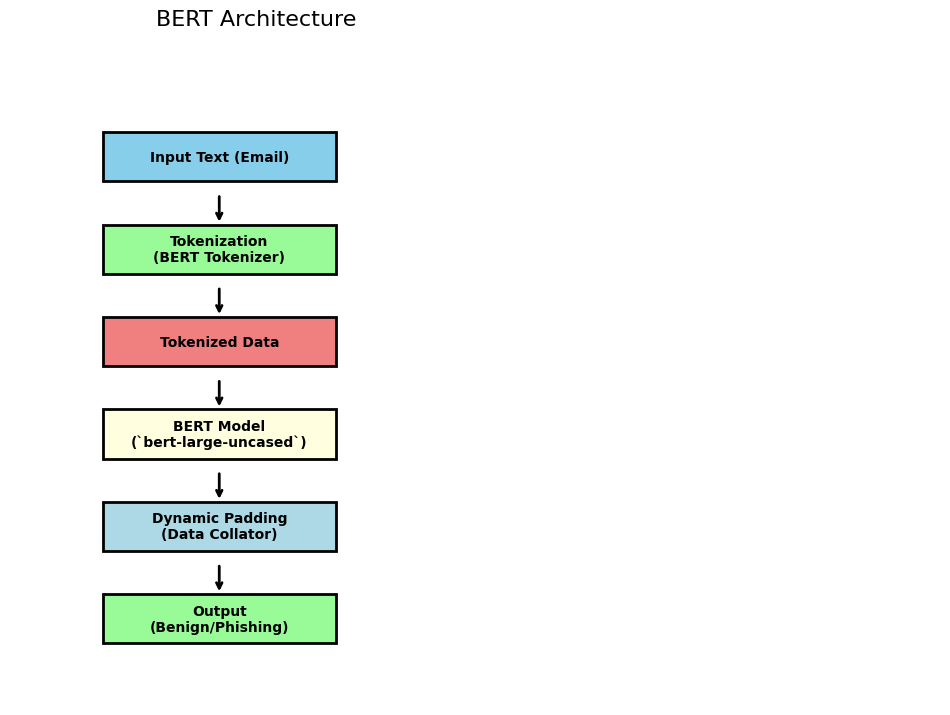

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def plot_bert_phishing_finetuning():
    # Create a figure and axis for plotting
    fig, ax = plt.subplots(figsize=(12, 8))

    # Set axis limits
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    # Define vertical spacing between boxes
    spacing = 0.15  # Increased spacing for larger boxes

    # Define box height and width
    box_height = 0.08  # Increased box height
    box_width = 0.25

    # Create rectangles (boxes) for each part of the BERT architecture
    boxes = [
        ('Input Text (Email)', (0.1, 0.85), 'skyblue'),
        ('Tokenization\n(BERT Tokenizer)', (0.1, 0.85 - spacing), 'palegreen'),
        ('Tokenized Data', (0.1, 0.85 - 2 * spacing), 'lightcoral'),
        ('BERT Model\n(`bert-large-uncased`)', (0.1, 0.85 - 3 * spacing), 'lightyellow'),
        ('Dynamic Padding\n(Data Collator)', (0.1, 0.85 - 4 * spacing), 'lightblue'),
        ('Output\n(Benign/Phishing)', (0.1, 0.85 - 5 * spacing), 'palegreen'),
    ]

    # Add the rectangles (boxes)
    for label, position, color in boxes:
        # Create rectangles with a corner radius
        ax.add_patch(mpatches.Rectangle(position, box_width, box_height, linewidth=2, edgecolor='black', facecolor=color))
        ax.text(position[0] + box_width / 2, position[1] + box_height / 2, label, 
                fontsize=10, ha='center', va='center', fontweight='bold')

    # Draw arrows between the boxes from bottom to top
    arrow_props = dict(arrowstyle="->", lw=2, color='black')

    # Connecting arrows (from bottom of one box to the top of the next)
    for i in range(len(boxes) - 2):  # Exclude last box for direct training connection
        start_x = boxes[i][1][0] + box_width / 2  # Center X of current box
        start_y = boxes[i][1][1]  # Bottom of the current box
        end_y = boxes[i + 1][1][1] + box_height  # Top of the next box
        ax.annotate('', xy=(start_x, end_y), xytext=(start_x, start_y - 0.02), arrowprops=arrow_props)  # Adjusted offset

    # Arrow from Dynamic Padding to Output
    dynamic_padding_x = boxes[4][1][0] + box_width / 2  # Center X of Dynamic Padding box
    dynamic_padding_y = boxes[4][1][1]  # Bottom of Dynamic Padding box
    output_y = boxes[5][1][1] + box_height  # Top of Output box
    ax.annotate('', xy=(dynamic_padding_x, output_y), xytext=(dynamic_padding_x, dynamic_padding_y - 0.02), arrowprops=arrow_props)


    # Set the title above the boxes and center it horizontally
    plt.suptitle("BERT Architecture", 
                 fontsize=16, x=0.33, y=0.98, ha='center')

    # Hide axis for better visualization
    ax.axis('off')

    plt.show()


plot_bert_phishing_finetuning()
